In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
# Converting timestamp to date-time format
df['timestamp']=pd.to_datetime(df['timestamp'],format ="%Y-%m-%d %H:%M:%S")

In [4]:
# We can see timestamp has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:

df['count_log'] = np.log1p(df['cnt'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,count_log
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,5.209486
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,4.934474
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,4.905275
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,4.290459
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,3.871201


In [6]:
weather_dict = {1 : 0,  2 : 0,  3 : 0,  4 : 0, 
                7 : 1, 10 : 1, 26 : 1, 94 : 1}
df['weather_code']=df['weather_code'].replace(weather_dict)

In [7]:
df_weekend=df[df['is_weekend']==1]
df_weekend=df_weekend.drop(['is_holiday','is_weekend'],axis=1)

In [8]:
#Non -weekend
df_nw=df[df['is_weekend']==0]
df_nw=df_nw.drop(['is_holiday','is_weekend'],axis=1)

In [9]:
df_hol=df[df['is_holiday']==1]
df_hol=df_hol.drop(['is_holiday','is_weekend'],axis=1)

In [10]:
#Function to Plot the count of bikeshares per hour
def hour_plot(df,title):
    df.groupby(by=df.timestamp.dt.hour)['cnt'].mean().plot()
    plt.title(title)
    plt.ylabel('count')
    plt.legend(['workdays','weekend','holidays'],loc=2, fontsize = 'medium')

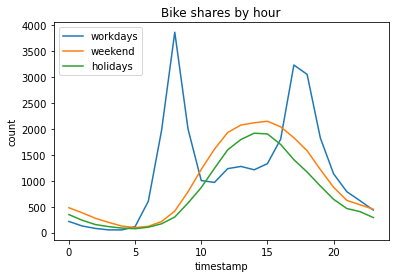

In [11]:
hour_plot(df_nw, 'Bike shares by hour')
hour_plot(df_weekend, 'Bike shares by hour')
hour_plot(df_hol, 'Bike shares by hour')

### Feature Engineering

In [12]:
#Combining is_holiday and is_weekend as Non-workday
df['is_non_workday'] = df['is_holiday'] + df['is_weekend']
df = df.drop(['is_holiday','is_weekend'],axis=1)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,count_log,is_non_workday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,3.0,5.209486,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,3.0,4.934474,1.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,3.0,4.905275,1.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,3.0,4.290459,1.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,3.0,3.871201,1.0


In [13]:
# seperate timestamp into month ,day ,year
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['day'] =df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,count_log,is_non_workday,month,year,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,3.0,5.209486,1.0,1,2015,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,3.0,4.934474,1.0,1,2015,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,3.0,4.905275,1.0,1,2015,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,3.0,4.290459,1.0,1,2015,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,3.0,3.871201,1.0,1,2015,6,4


In [14]:
#We want to convey time's cyclic nature to our model , thus we are applying sine and cosine transforms
def add_encode(df, column, max_value):
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

In [15]:
add_encode(df,'hour',23)
add_encode(df,'month',12)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,count_log,is_non_workday,month,year,day,hour,hour_sin,hour_cos,month_sin,month_cos
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,3.0,5.209486,1.0,1,2015,6,0,0.000000e+00,1.000000,0.5,0.866025
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,3.0,4.934474,1.0,1,2015,6,1,2.697968e-01,0.962917,0.5,0.866025
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,3.0,4.905275,1.0,1,2015,6,2,5.195840e-01,0.854419,0.5,0.866025
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,3.0,4.290459,1.0,1,2015,6,3,7.308360e-01,0.682553,0.5,0.866025
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,3.0,3.871201,1.0,1,2015,6,4,8.878852e-01,0.460065,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,3.0,6.949856,0.0,1,2017,1,19,-8.878852e-01,0.460065,0.5,0.866025
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,3.0,6.295266,0.0,1,2017,1,20,-7.308360e-01,0.682553,0.5,0.866025
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,3.0,5.823046,0.0,1,2017,1,21,-5.195840e-01,0.854419,0.5,0.866025
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,3.0,5.416100,0.0,1,2017,1,22,-2.697968e-01,0.962917,0.5,0.866025


In [16]:
# We group by based on day to explore more findings
df[df['count_log']<6].groupby(by='day').count()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,count_log,is_non_workday,month,year,hour,hour_sin,hour_cos,month_sin,month_cos
day,,,,,,,,,,,,,,,,,
0,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800
1,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731,731
2,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711,711
3,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715
4,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683,683
5,865,865,865,865,865,865,865,865,865,865,865,865,865,865,865,865,865
6,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994


In [17]:
# After grouping based on hour we find that day light might be a major factor impacting the count of bike shares

In [18]:
df['is_night'] = 0

df.loc[(df['hour'] < 6) | (df['hour'] > 20), 'is_night'] = 1

In [19]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,count_log,is_non_workday,month,year,day,hour,hour_sin,hour_cos,month_sin,month_cos,is_night
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,3.0,5.209486,1.0,1,2015,6,0,0.000000,1.000000,0.5,0.866025,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,3.0,4.934474,1.0,1,2015,6,1,0.269797,0.962917,0.5,0.866025,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,3.0,4.905275,1.0,1,2015,6,2,0.519584,0.854419,0.5,0.866025,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,3.0,4.290459,1.0,1,2015,6,3,0.730836,0.682553,0.5,0.866025,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,3.0,3.871201,1.0,1,2015,6,4,0.887885,0.460065,0.5,0.866025,1


C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

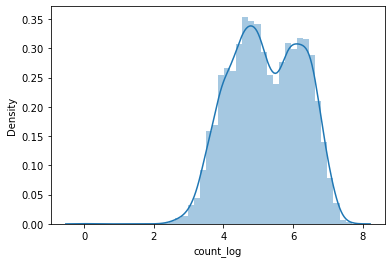

In [20]:
#Histogram of logarithm transformed count of bike shares during the night
sns.distplot(df[df['is_night']==1]['count_log'])
plt.ylabel('Density')

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

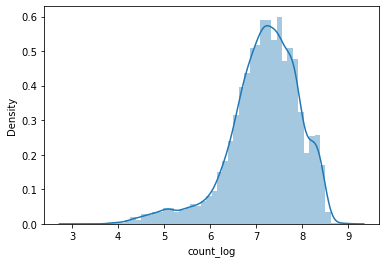

In [21]:
#Histogram of logarithm transformed count of bike shares during the day
sns.distplot(df[df['is_night']==0]['count_log'])
plt.ylabel('Density')

### Modeling

In [22]:
# Import all packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
df = df.drop(['timestamp','cnt'],axis=1)

In [24]:
X=df.drop(['count_log'],axis=1) # features
y=df['count_log'] # labels

In [25]:
# Standardizing feature values using sklearn's preprocessing
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

In [26]:
#Split the data set into training and testing category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Now it's time to validate our dataset using test data 
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

0.05509501078981437


In [58]:
from sklearn.linear_model import Lasso
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = Lasso(random_state=21)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

1.715523712846779


In [29]:

from sklearn.linear_model import ElasticNet
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = ElasticNet(random_state=21)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

1.1644687674767138


In [30]:

from sklearn.linear_model import LinearRegression
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = LinearRegression()
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

0.4586788210409597


In [62]:
from sklearn.linear_model import Ridge
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = Ridge(fit_intercept=True)
model.fit(rescaled_X_train, y_train)

#transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print(mean_squared_error(y_test, predictions))

0.45868027310022264
